In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
sin(x) - 1/2 = 0의 해를 구하여라

In [2]:
eps = 1e-8

def f(x):
    return np.sin(x)-0.5

def df(x):
    return np.cos(x)

x = 1

while(np.abs(f(x)) > eps):
    x -= f(x)/df(x)

print(x, f(x))

0.5235987755798704 -1.5959511490137857e-11


In [3]:
import time
t_0 = time.time()
eps = 1e-8

def f(x):
    return np.sin(x)-0.5

def df(x):
    return np.cos(x)

x = 1

while(np.abs(f(x)) > eps):
    x -= f(x)/df(x)

print(x, f(x))
print(time.time()-t_0)

0.5235987755798704 -1.5959511490137857e-11
0.00023818016052246094


In [4]:
t_1 = time.time()
eps = 1e-8
def g(x):
    return np.sin(x)-0.5

y0 = 0.0
y1 = np.pi / 2.0

while(abs(y0-y1)>eps):
    y2 = (y0+y1)/2.0
    if ((g(y2)*g(y0)) < 0.0):
        y1 = y2
    else:
        y0 = y2

print(y2, f(y2))
print(time.time()-t_1)

0.5235987736477412 -1.68923247612085e-09
0.00025773048400878906


위의 문제에서는 Bisection Method보다 Newton's Method가 더 빠른 것을 확인할 수 있다.  
Bisection method와 Newton's method 모두 반복법(iterative method)을 사용하는데, 두 알고리즘의 수렴 속도는 문제에 따라 다를 수 있다.  
각 알고리즘의 특성에 따라 빠르게 수렴하는 경우와 그렇지 않은 경우는 다음과 같다.

1. **Bisection Method:**
   - 이분법은 구간을 반으로 나누어서 해가 있는 쪽을 선택하는 방법으로, 수렴 속도가 일정하다.
   - 주어진 구간에서 균등하게 수렴하므로 안정적으로 동작한다.
   - 함수가 매끄럽고 단조인 경우에 효과적이다.

2. **Newton's Method:**
   - 뉴턴 메소드는 현재 추정값에서의 기울기를 사용하여 해를 찾아가는 방법으로, 수렴 속도가 초기 추정값에 따라 다를 수 있다.
   - 초기 추정값에 따라 수렴이 빠를 수도, 느릴 수도 있다.
   - 함수의 기울기가 0에 가까워지면 수렴이 느려질 수 있으며, 초기 추정값에 따라 해가 발산할 수도 있다.

따라서 어떤 알고리즘이 더 빠르다고 일반적으로 말하기는 어렵다. 문제에 따라 다르며, 초기 추정값의 선택, 함수의 특성, 수렴 속도 등을 고려하여 적절한 알고리즘을 선택해야 한다. 상황에 따라서는 둘 다 시도하고 더 나은 결과를 얻는 것이 좋을 수 있다.

---
이분법을 이용해 x^5+x = 1의 해를 구해본다.

In [7]:
eps = 1e-06

def f(x):
    return x**5 + x - 1

def df(x):
    return (5*x)**4 + 1

x = 0.5

while(abs(f(x)) > eps):
    x = x- f(x)/df(x)

print(x, f(x))

0.7548772863716895 -9.966355578594488e-07


---
자성체 문제를 Newton's method를 이용해 풀어라

In [11]:
import numpy as np

# Ising 모델에서의 자화도 함수 및 도함수 정의
def magnetization(theta, T):
    k = 1.0  # 볼츠만 상수
    J = 1.0  # 상호 작용 에너지 상수

    return np.tanh(J / (k * T) * (1 + np.cos(theta)))

def magnetization_derivative(theta, T):
    k = 1.0  # 볼츠만 상수
    J = 1.0  # 상호 작용 에너지 상수

    return -J / (k * T) * np.sin(theta) / np.cosh(J / (k * T) * (1 + np.cos(theta)))**2

# Newton's method 함수 정의
def newton_method(initial_guess, T, tol=1e-6, max_iter=100):
    theta = initial_guess
    
    for _ in range(max_iter):
        f_theta = magnetization(theta, T)
        f_prime_theta = magnetization_derivative(theta, T)
        
        if abs(f_theta) < tol:
            return theta  # 수렴 조건 충족시 theta 반환
        
        theta = theta - f_theta / f_prime_theta  # Newton's method 공식
    
    return None  # 수렴하지 않는 경우 None 반환

# 주어진 값 설정
T_c = 2.26  # 상전이 온도 (임의의 값)
initial_guess = 1.0  # 초기 추정값

# Newton's method를 사용하여 자화도 계산
magnetization_solution = newton_method(initial_guess, T_c)

# 결과 출력
if magnetization_solution is not None:
    print(f"자화도의 값: {magnetization_solution}")
else:
    print("수렴하지 않았습니다. 더 많은 반복이 필요할 수 있습니다.")

자화도의 값: 3.1427932844131607


/var/folders/gn/jcs859qn2jlg64hlb2md7_ch0000gn/T/ipykernel_31744/731063411.py:11: RuntimeWarning: overflow encountered in cosh
  f_prime_theta = 1.0 / np.cosh(theta / T)**2
/var/folders/gn/jcs859qn2jlg64hlb2md7_ch0000gn/T/ipykernel_31744/731063411.py:11: RuntimeWarning: overflow encountered in double_scalars
  f_prime_theta = 1.0 / np.cosh(theta / T)**2


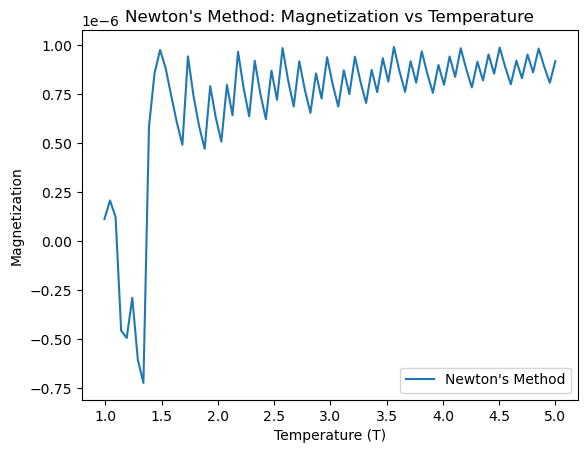

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(T, initial_guess, tol=1e-6, max_iter=100):
    theta = initial_guess
    magnetizations = []

    for _ in range(max_iter):
        try:
            f_theta = np.tanh(theta / T)
            f_prime_theta = 1.0 / np.cosh(theta / T)**2
        except RuntimeWarning:
            # 예외 처리: 오버플로우나 0으로 나누는 경우, 안전한 값으로 대체
            f_prime_theta = 0

        magnetizations.append(f_theta)

        if abs(f_theta) < tol:
            return magnetizations
    
        theta = theta - f_theta / f_prime_theta if f_prime_theta != 0.0 else theta  # Newton's method 공식

    return None

T_values = np.linspace(0.1, 5, 100)
initial_guess = 1.0

magnetization_results = []
for T in T_values:
    result = newton_method(T, initial_guess)
    if result is not None:
        magnetization_results.append(result[-1])
    else:
        magnetization_results.append(None)

plt.plot(T_values, magnetization_results, label='Newton\'s Method')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization')
plt.legend()
plt.title('Newton\'s Method: Magnetization vs Temperature')
plt.show() 

---
z^3 - 1 = 0에서 복소수 z=x+iy라고 하자. 이 방정식에 대해 newton's method가 성립한다고 할 때, 처음 복소수 z_1을 뭘로 정하는지에 따라 답은 다음 세 가지 중 하나로 수렴한다. 1, exp(i*4pi/3), exp(i*2pi/3).  이제 1로 수렴하는 z_1은 파란색 점, exp(i*2pi/3)으로 수렴하는 z_1은 빨간색 점, exp(i*4pi/3)으로 수렴하는 z_1은 초록색 점으로 해서 복소평면 위의 사각형(-1 < x, y < 1)을 채우시오.

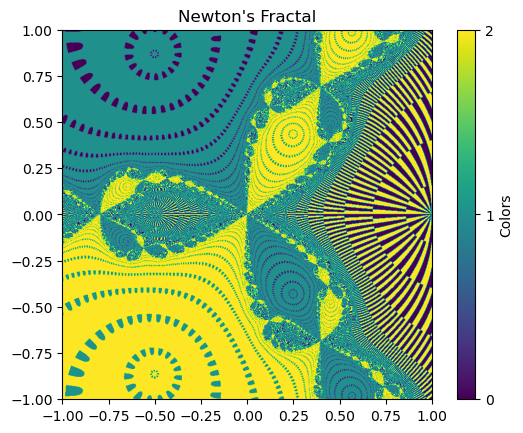

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(z, max_iter=50, tol=1e-6):
    for i in range(max_iter):
        fz = z**3 - 1
        dfz = 3 * z**2
        z = z - fz / dfz
        
        if abs(fz) < tol:
            return z
    
    return None

def plot_newton_fractal():
    x_vals = np.linspace(-1, 1, 800)
    y_vals = np.linspace(-1, 1, 800)
    
    colors = []

    for y in y_vals:
        for x in x_vals:
            z = complex(x, y)
            root = newton_method(z)
            
            if root is not None:
                angle = np.angle(root)
                if angle < 0:
                    angle += 2 * np.pi

                if angle < 2 * np.pi / 3:
                    colors.append(0.0)  # 파란색
                elif angle < 4 * np.pi / 3:
                    colors.append(1.0)  # 빨간색
                else:
                    colors.append(2.0)  # 초록색
            else:
                colors.append(3.0)  # 검정색

    colors = np.array(colors).reshape((len(y_vals), len(x_vals)))

    plt.imshow(colors, cmap='viridis', extent=[-1, 1, -1, 1], origin='lower')
    plt.colorbar(ticks=[0, 1, 2, 3], label='Colors')
    plt.title("Newton's Fractal")
    plt.show()

# 실행
plot_newton_fractal()